This project focuses on a company dataset found on the data website Kaggle

We will explore relationships between several variables including age, gender, education level, skill lebel and business unit. 

As a beginning data analyst hobbyist I utilized the tools that I felt most effectively visualizes the various relationships in the data. 
Feel free to leave any comments or suggestions on my project. Thanks for viewing! 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import itertools
## used for concatenation

In [6]:
from scipy import stats

In [7]:
from numpy import percentile

In [8]:
df=pd.read_csv("Test.csv")

Let's take a look at our dataset

In [9]:
print(df.head())

  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_22713      F  32.0                5              Single  Springfield   
1    EID_9658      M  65.0                2              Single      Lebanon   
2   EID_22203      M  52.0                3             Married  Springfield   
3    EID_7652      M  50.0                5              Single   Washington   
4    EID_6516      F  44.0                3             Married     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual              7.0                     4   
1         IT              Directive             41.0                     2   
2      Sales              Directive             21.0                     3   
3  Marketing             Analytical             11.0                     4   
4        R&D             Conceptual             12.0                     4   

   ...  Pay_Scale  Compensation_and_Benefits  Work

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [11]:
df.isnull().sum(axis = 0)
# a view of columns with null values

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [12]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
count,2839.000000,3000.000000,2948.000000,3000.000000,3000.000000,3000.000000,3000.000000,2997.000000,2995.000000,3000.000000,2783.000000,3000.000000,2702.000000,3000.000000,3000.000000,3000.000000
mean,39.797816,3.226333,13.403664,2.405333,46.878000,0.827333,2.794667,6.060727,2.380968,3.067000,0.027530,0.012328,1.907476,2.836333,7.130333,3.232333
std,13.501754,1.065904,10.189245,1.150426,16.051947,0.642643,1.188125,2.096866,1.142826,0.821017,0.999799,0.999734,0.544526,0.940837,1.152876,0.903305
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000
50%,38.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000
75%,52.000000,4.000000,21.000000,3.000000,60.000000,1.000000,4.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000


  Let's view some data on age of company employees

In [13]:
age=df['Age']

In [14]:
ages=age[~pd.isnull(age)]
# This looks at the age column, ignoring the null values.

In [15]:
# 5 number summary showing age of employees

data_min, data_max = ages.min(), ages.max()
quartiles = percentile(ages, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 27.000
Median: 38
Q3: 52
Max: 65


In [16]:
# df.Age.value_counts(ascending=True)
# Shows number of employees at each age, I will use this data for creating the age groups below

In [17]:
## To find percentages, divide each age group by 2839 (total employees 300 -162 null values)

In [18]:
np.sum(df.Age)

112986.0

In [19]:
age_19_to_24=[62,54,71,112,60,79]
# sum 438  #438/2839 = 0.15427968

In [20]:
age_25_to_34=[85,95,105,83,39,95,65,81,41,41]
# sum =730  # 730/2839 = 0.25713279

In [21]:
age_35_to_44=[83,32,94,46,37,42,49,84,44,38]
# sum =549  # 549/2839 =0.19337795

In [22]:
age_45_to_54=[90,34,77,43,40,55,39,100,45,92]
# sum =615  # 615/2839 = 0.211662557

In [23]:
age_55_and_over=[41,46,44,48,58,89,28,32,30,30,61]
# sum =507  # 507/2839 = 0.17858401

In [24]:
#by pct
ee_age_group_pcts=[0.154,0.257,0.193,0.212,0.179]

In [25]:
#2019 US Labor force data: 
us_age_group_pcts=[0.129,0.227,0.208,0.201,0.234]

In [26]:
pos=[2,4,6,8,10]

In [27]:
bars=('19 to 24', '25 to 34', '35 to 44', '45 to 54', '55 and older')

<Figure size 432x288 with 0 Axes>

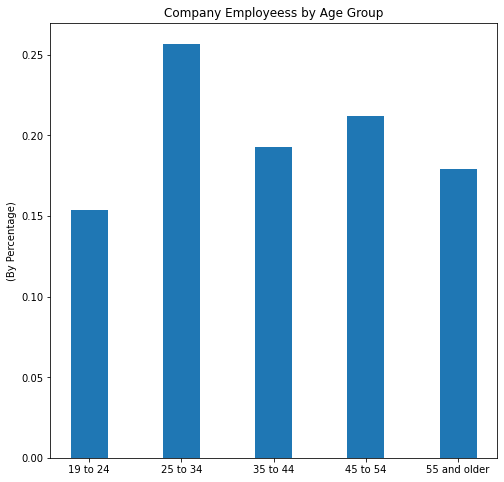

In [28]:
plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(pos, ee_age_group_pcts)
plt.xticks(pos, bars)
plt.ylabel("(By Percentage)")
plt.title("Company Employeess by Age Group")
plt.savefig("ees_by_age_group.jpg")
plt.show()


We can view the US Labor statistics for employment by age groups for comparison: https://www.bls.gov/emp/graphics/2019/labor-force-share-by-age-group.htm

It appears that this company has a slightly younger employee base vs. the US labor pool

<Figure size 432x288 with 0 Axes>

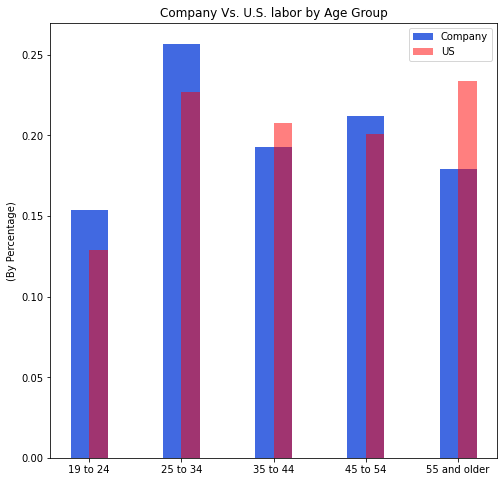

In [29]:
plt.clf()
width = 0.8

ee_age_group_pcts=[0.154,0.257,0.193,0.212,0.179]
us_age_group_pcts=[0.129,0.227,0.208,0.201,0.234]

pos=[2, 4, 6, 8, 10]
bars=('19 to 24', '25 to 34', '35 to 44', '45 to 54', '55 and older')
fig= plt.figure(figsize=(8,8))

plt.bar(pos, ee_age_group_pcts, width=width, 
        color='royalblue', label='Company')
plt.bar([i+0.25*width for i in pos], us_age_group_pcts, 
       width=0.5*width, color='r', alpha=0.5, label='US')
plt.ylabel("(By Percentage)")
plt.title("Company Vs. U.S. labor by Age Group")
plt.xticks(pos, bars )


plt.legend()
plt.savefig("Company_vs_US_labor_by_age.jpg")
plt.show()

---------------------------------------------------

How about the gender ratio at the company? There are significantly more females than males

In [30]:
df['Gender'] =df['Gender'].replace({'M': 0, 'F' :1})

In [31]:
df.Gender.value_counts()
# 1728: 57.6% = Female
# 1272: 42.4% = Male

1    1728
0    1272
Name: Gender, dtype: int64

<Figure size 432x288 with 0 Axes>

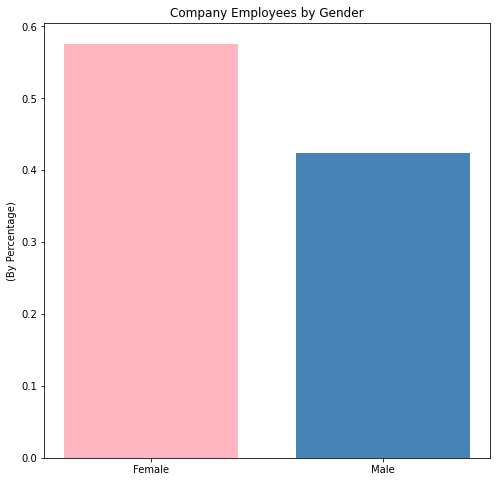

In [32]:
ee_gender_pcts=[0.576, 0.424]
x_pos=[1,2]
bars=('Female', 'Male')

plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(x_pos, ee_gender_pcts, color = ['lightpink', 'steelblue'], width= [0.75, 0.75])
plt.xticks(x_pos, bars)
plt.ylabel("(By Percentage)")
plt.title("Company Employees by Gender")
plt.savefig("ees_by_gender.jpg")
plt.show()

----------------------------------------------------------

Looking at realationship status can be helpful to gain insight into the group dynamics within a company. We can see that approximately 65% of employees are married.

In [33]:
df.Relationship_Status.value_counts()
# single: 1059:  =35.3% of employees are single
# Married: 1941:  =64.7% of employees are married

Married    1941
Single     1059
Name: Relationship_Status, dtype: int64

<Figure size 432x288 with 0 Axes>

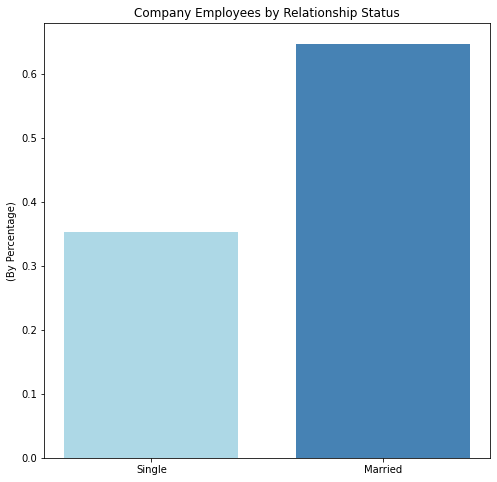

In [34]:
ee_relationship_pcts=[0.353, 0.647]
x_pos=[1,2]
bars=('Single', 'Married')

plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(x_pos, ee_relationship_pcts, color = ['lightblue', 'steelblue'], width= [0.75, 0.75])
plt.xticks(x_pos, bars)
plt.ylabel("(By Percentage)")
plt.title("Company Employees by Relationship Status")
plt.savefig("ees_by_relationship_status.jpg")
plt.show()

--------------------------------------------

In [35]:
# We will create a male and female dataframes below which we can use for later data analysis
df['Relationship_Status'] =df['Relationship_Status'].replace({'Single': 0, 'Married' :1})

In [36]:
gender_male=df[df['Gender']==0]
# gender_male.count() =1272 Males

In [37]:
gender_female=df[df['Gender']==1]
# gender_female.count() = 1728

--------------------------------------------

Now let's take a look at the Pay Scale at the company.

In [38]:
df.Pay_Scale.describe()

count    2997.000000
mean        6.060727
std         2.096866
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Pay_Scale, dtype: float64

In [39]:
df.Pay_Scale.value_counts()
# totals added up to 2997, but I divided each number by 3000 to get the pct
# 8.0     572   =0.19066667%
# 6.0     536   =0.17866667%
# 5.0     480   =0.16%
# 4.0     422   =0.14066667%
# 7.0     352   =0.11733333%
# 9.0     239   =0.07966667%
# 3.0     111   =0.037%
# 2.0     106   =0.03533333%
# 10.0    105   =0.035%
# 1.0      74   =0.0246667%


8.0     572
6.0     536
5.0     480
4.0     422
7.0     352
9.0     239
3.0     111
2.0     106
10.0    105
1.0      74
Name: Pay_Scale, dtype: int64

The Pay Scale distribution looks fairly normal, however we can see that the highest pay scale by percentage is towards the uppper end at level 8.

<Figure size 432x288 with 0 Axes>

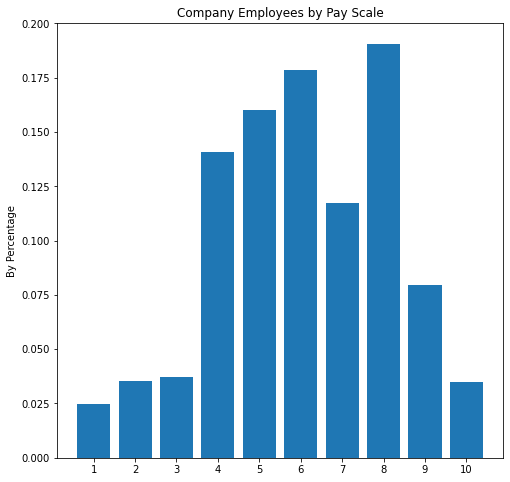

In [40]:
employee_payscale_by_pct =[0.0246667, 0.03533333, 0.037, 0.14066667, 0.16, 0.17866667, 0.11733333, 0.19066667, 0.07966667, 0.035]
bars=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
x_pos=[1,2,3,4,5,6,7,8,9,10]

plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(x_pos, employee_payscale_by_pct)
plt.xticks(x_pos, bars)
plt.ylabel("By Percentage")
plt.title("Company Employees by Pay Scale")
plt.savefig("ees_by_payscale.jpg")
plt.show()

------------------------------------------------------------------------------------------------------------------

We will create a dataframe where high pay is equal to a pay scale of 7 or greater for further analysis.

In [41]:
high_pay=df[df['Pay_Scale']>=7]
# high_pay.count() =1268
# 1268/2997 = 42.3% of all employees are highly paid

We will now take a look at pay equity between males and females. It appears to be pretty balanced with 42.9% of males earning a high salary vs. 41.7% of females.

In [42]:
female_high_pay=gender_female[gender_female['Pay_Scale']>=7]
# female_high_pay.count() =722
# 722/1728 = 0.41782407
# 41.7% of female employees are highly paid

In [43]:
male_high_pay=gender_male[gender_male['Pay_Scale']>=7]
# male_high_pay.count() =546
# 546/1272 = 0.42924528
# 42.9% of male employees are highly paid

<Figure size 432x288 with 0 Axes>

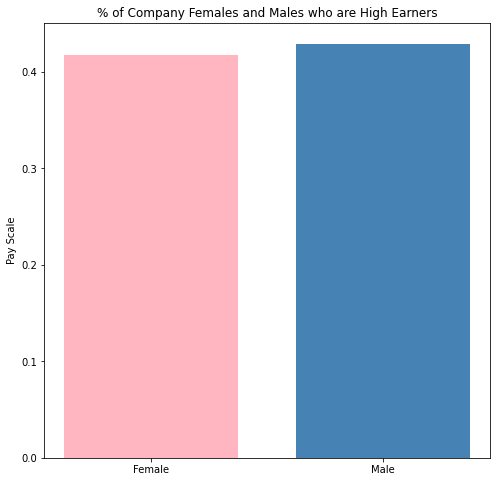

In [44]:
height =[0.41782407407407407, 0.42924528301886794]
bars=('Female', 'Male')
x_pos=[4,5]

plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(x_pos, height, color = ['lightpink', 'steelblue'], width= [0.75, 0.75])
plt.xticks(x_pos, bars)
plt.ylabel("Pay Scale")
plt.title("% of Company Females and Males who are High Earners")
plt.savefig("pct_ees_by_gender_high_earners")
plt.show()

-------------------------------------------------------------------------------------------

Let's break down company employees by age two age groups: younger and older employees.

39.5% of all company employees are 45 or older.

In [45]:
older_ees=df[df['Age']>=45]
# older_ees.describe()
# count = 1122  
# remove null values from age: 1122/2839:
# = 39.5% 

43% of employees age 45 and over are at a higher pay scale (7 or higher).

In [46]:
older_ees_with_higher_pay=older_ees[older_ees['Pay_Scale']>=7]
# older_ees_with_higher_pay.describe()
# count = 483    (483/1122 = 0.43048128)
# 43% of ees age 45 and over are at a higher pay scale (7 or higher)

60.5% of all company employees are 44 or younger.

In [47]:
younger_ees=df[df['Age']<=44]
# younger_ees.describe()
# count = 1717
# remove null values from age: 1717/2839
# = 0.60479042

42% of employees age 44 and younger are at a higher pay scale (7 or higher)

In [48]:
younger_ees_with_higher_pay=younger_ees[younger_ees['Pay_Scale']>=7]
# younger_ees_with_higher_pay.describe()
# count = 718

In [49]:
younger_ees_with_higher_pay_pct=718/1717
# = 0.4181712288875946

--------------------------------------------

Next let's look at Education levels at the Company.

In [50]:
df.Education_Level.describe()

count    3000.000000
mean        3.226333
std         1.065904
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education_Level, dtype: float64

In [51]:
df.Education_Level.value_counts()
# divide each value by 3000
# 1 = 284  = 0.09466667%
# 2 = 291  = 0.097%
# 3 = 1185 = 0.395%
# 4 = 942  = 0.314%
# 5 = 298  = 0.09933333%

3    1185
4     942
5     298
2     291
1     284
Name: Education_Level, dtype: int64

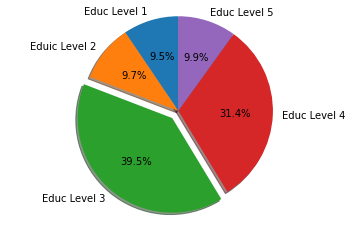

In [52]:
# We can also view the education levels of company employees
# It looks like a good portion of employees have an edujcation level of 3 followed by education level 4
labels = 'Educ Level 1', 'Eduic Level 2', 'Educ Level 3', 'Educ Level 4', 'Educ Level 5'
sizes = [0.09466667, 0.097, 0.395, 0.314, 0.09933333]
explode = (0, 0, 0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("ees_by_education_level.jpg")
plt.show()

In [53]:
df.pivot_table(index='Education_Level', columns='Pay_Scale', aggfunc={'Pay_Scale':len}, fill_value=0)

Pay_Scale                                             
Pay_Scale            1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0
Education_Level                                                       
1                       8    4    8   42   46   50   39   55   23    9
2                      10   11   11   46   50   47   33   52   23    7
3                      29   40   53  153  196  209  132  226   94   52
4                      16   40   29  132  140  172  115  192   77   28
5                      11   11   10   49   48   58   33   47   22    9

------------------------------------

We will create a dataframe where higher education is an Education Level of 3 or greater.

In [54]:
higher_ed=df.where(df['Education_Level']>=3)
# higher_ed.count() = 2425/3000
# = 80.8% of all company employees are highly educated

In [55]:
lower_ed=df.where(df['Education_Level']<3)
# lower_ed.count() =575/3000 = 
# = 575
# = 19.2% pf all company employees have an education level lower than 3

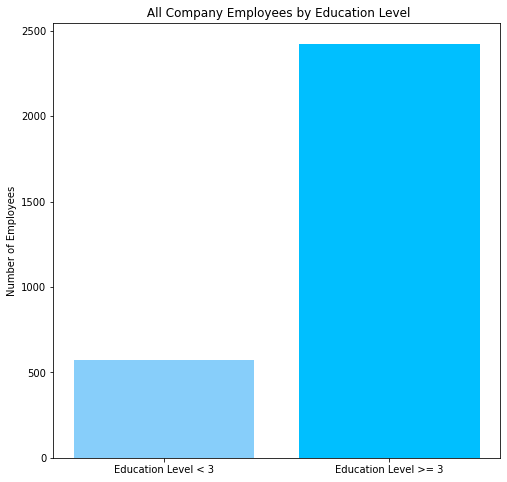

In [56]:
height =[575, 2425]
bars=('Education Level < 3', 'Education Level >= 3')
x_pos=[4,5]
fig= plt.figure(figsize=(8,8))
plt.bar(x_pos, height, color = ['lightskyblue', 'deepskyblue'])
plt.xticks(x_pos, bars)
plt.ylabel("Number of Employees")
plt.title(" All Company Employees by Education Level")
plt.savefig("ees_education_levels_by_group.jpg")
plt.show()

-----------------------------------------------------

We can also see higher Education Levels by Gender, as you can see it is pretty balanced.

In [57]:
educated_female=higher_ed.where(higher_ed['Gender']==1)
# educated_female.count() =1388 /1728= 80.3% of
# 1388/1728 = 0.80324074
# 80.3% of female company employees are highly educated

In [58]:
print(np.mean(educated_female))

Gender                   1.000000
Age                     39.625000
Education_Level          3.621758
Relationship_Status      0.631124
Time_of_service         13.200000
Time_since_promotion     2.417147
growth_rate             47.250000
Travel_Rate              0.805476
Post_Level               2.768012
Pay_Scale                6.045455
Work_Life_balance        2.401154
VAR1                     3.028818
VAR2                     0.065958
VAR3                    -0.024526
VAR4                     1.917402
VAR5                     2.823487
VAR6                     7.121758
VAR7                     3.242795
dtype: float64


In [59]:
educated_male=higher_ed.where(higher_ed['Gender']==0)
# educated_male.count() =1037
# 1037 /1272 = 0.81525157
# 81.5% of male company employees are highly educated

In [60]:
print(np.mean(educated_male))

Gender                   0.000000
Age                     39.422018
Education_Level          3.650916
Relationship_Status      0.662488
Time_of_service         13.187807
Time_since_promotion     2.387657
growth_rate             46.505304
Travel_Rate              0.848602
Post_Level               2.778206
Pay_Scale                6.106075
Work_Life_balance        2.386100
VAR1                     3.125362
VAR2                    -0.036389
VAR3                     0.044597
VAR4                     1.880470
VAR5                     2.840887
VAR6                     7.132112
VAR7                     3.220829
dtype: float64


<Figure size 432x288 with 0 Axes>

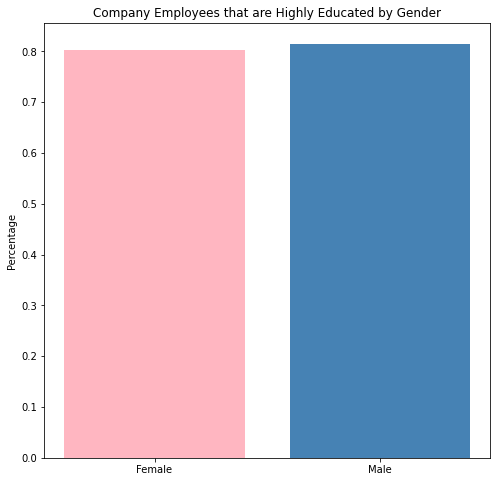

In [61]:
plt.clf()

heights =[0.80324074,
    0.81525157]
bars=('Female', 'Male')
x_pos=[4,5]
fig= plt.figure(figsize=(8,8))
plt.bar(x_pos, heights, color = ['lightpink', 'steelblue'])
plt.xticks(x_pos, bars)
plt.title("Company Employees that are Highly Educated by Gender")
plt.ylabel("Percentage")
plt.savefig("high_paid_&_high_ed_by_gender.jpg")
plt.show()

--------------------------------

Let's take a look at the relationship between Pay Scale and Education Level.

In [62]:
df.pivot_table(index='Education_Level', columns='Pay_Scale', aggfunc={'Pay_Scale':len}, fill_value=0)

Pay_Scale                                             
Pay_Scale            1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0
Education_Level                                                       
1                       8    4    8   42   46   50   39   55   23    9
2                      10   11   11   46   50   47   33   52   23    7
3                      29   40   53  153  196  209  132  226   94   52
4                      16   40   29  132  140  172  115  192   77   28
5                      11   11   10   49   48   58   33   47   22    9

-----------------------

We can also view Pay Scale and Education level by Gender.

In [63]:
data_crosstab = pd.crosstab([df.Gender, df.Pay_Scale], 
                             df.Education_Level, margins = False)   

<Figure size 432x288 with 0 Axes>

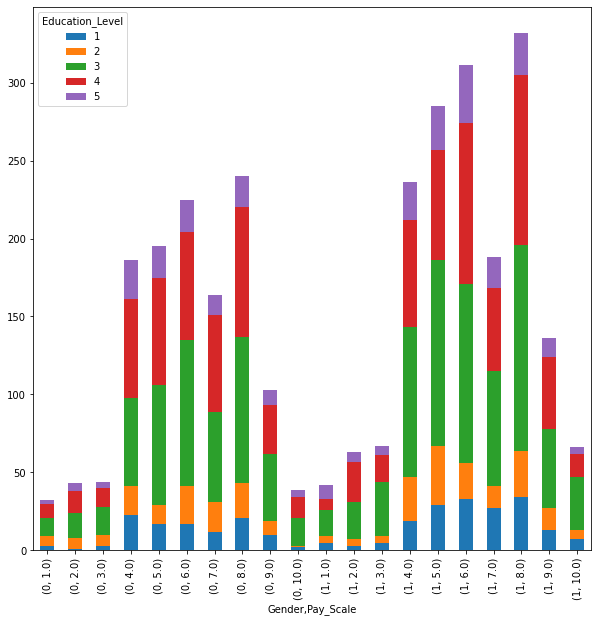

In [64]:
plt.clf()
data_crosstab.plot.bar(figsize=(10,10),stacked=True)
plt.savefig("gender_&_pay_scale_by_Ed_Level.jpg")
plt.show()



-------------------------------

Here is a count of employees by their Decision Skills.

In [65]:
df.Decision_skill_possess.value_counts()

Behavioral    799
Analytical    746
Directive     735
Conceptual    720
Name: Decision_skill_possess, dtype: int64

In [66]:
analytical_skill=df[df['Decision_skill_possess']=="Analytical"]

In [67]:
behavioral_skill=df[df['Decision_skill_possess']=="Behavioral"]

In [68]:
conceptual_skill=df[df['Decision_skill_possess']=="Conceptual"]

In [69]:
directive_skill=df[df['Decision_skill_possess']=="Directive"]

--------------------------------------------------

Next we will take a look at highly paid employees by skill level. Can we determine which skills lead to higher pay?

In [70]:
analytical_skill_high_pay=analytical_skill[analytical_skill['Pay_Scale']>=7]
# analytical_skill_high_pay.count() = 320

In [71]:
behavioral_skill_high_pay=behavioral_skill[behavioral_skill['Pay_Scale']>=7]
# behavioral_skill_high_pay.count() =348

In [72]:
conceptual_skill_high_pay=conceptual_skill[conceptual_skill['Pay_Scale']>=7] 
# conceptual_skill_high_pay.count() = 294

In [73]:
directive_skill_high_pay=directive_skill[directive_skill['Pay_Scale']>=7]
# directive_skill_high_pay.count() =306

<Figure size 432x288 with 0 Axes>

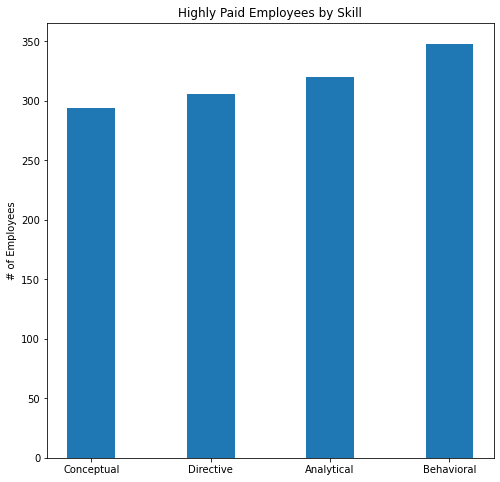

In [74]:
skills=[294,306,320,348]
pos=[2,4,6,8]
bars=('Conceptual', 'Directive', 'Analytical', 'Behavioral')

plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(pos, skills)
plt.xticks(pos, bars)
plt.ylabel("# of Employees")
plt.title("Highly Paid Employees by Skill")
plt.savefig("high_paid_ees_by_skill.jpg")
plt.show()
#Behavioral is the only one that stands out

-----------------------

How many highly paid employees work in each business unit? Let's find out. This can tell us a lot about allocation of salaries and could allow us to look at industry benchmarking analytics for comparison purposes.

df.Unit.unique()

In [75]:
RandD_high_pay=high_pay[high_pay['Unit']=='R&D']
# RandD_high_pay.count()  =113

In [76]:
IT_high_pay=high_pay[high_pay['Unit']=='IT']
# IT_high_pay.count() =195

In [77]:
sales_high_pay=high_pay[high_pay['Unit']=='Sales']
# sales_high_pay.count()  =201

In [78]:
marketing_high_pay=high_pay[high_pay['Unit']=='Marketing']
# marketing_high_pay.count()  =46

In [79]:
Purchasing_high_pay=high_pay[high_pay['Unit']=='Purchasing']
# Purchasing_high_pay.count()  =64

In [80]:
Operations_high_pay=high_pay[high_pay['Unit']=='Operarions']
# Operations_high_pay.count()  =105    fix spelling of Operations

In [81]:
Logistics_high_pay=high_pay[high_pay['Unit']=='Logistics']
# Logistics_high_pay.count()  =142

In [82]:
HR_high_pay=high_pay[high_pay['Unit']=='Human Resource Management']
# HR_high_pay.count()  =45

In [83]:
accounting_and_finance_high_pay=high_pay[high_pay['Unit']=='Accounting and Finance']
# accounting_and_finance_high_pay.count()   =63

In [84]:
security_high_pay=high_pay[high_pay['Unit']=='Security']
# security_high_pay.count()  =16

In [85]:
production_high_pay=high_pay[high_pay['Unit']=='Production']
# production_high_pay.count()   =27

In [86]:
quality_high_pay=high_pay[high_pay['Unit']=='Quality']
# quality_high_pay.count()  =30

<Figure size 432x288 with 0 Axes>

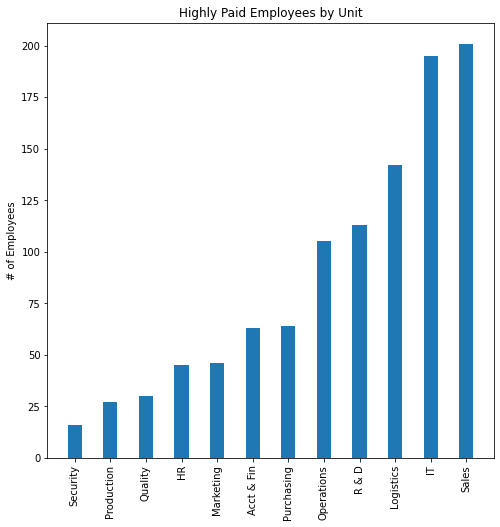

In [87]:
high_pay_by_unit=[16,27,30,45,46,63,64,105,113, 142,195, 201]
pos=[2,4,6,8,10,12,14,16,18,20,22,24]
bars=('Security', 'Production', 'Quality', 'HR', 'Marketing', 'Acct & Fin', 'Purchasing', 'Operations', 'R & D', 'Logistics', 'IT', 'Sales')

plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(pos, high_pay_by_unit)
plt.xticks(pos, bars, rotation=90, fontsize=10)
plt.ylabel("# of Employees")
plt.title("Highly Paid Employees by Unit")
plt.savefig("high_paid_ees_by_bus_unit.jpg")
plt.show()

As you can see, IT and Sales lead the way in the highest paying business units.

----------------------------------

Now let's view a count of employees by how they rated Work Life Balance at the Company on a scale of 1-5 (5 is the highest rating).

In [88]:
wlb_1=df[df['Work_Life_balance']==1]
# 909

In [89]:
wlb_2=df[df['Work_Life_balance']==2]
# 672

In [90]:
wlb_3=df[df['Work_Life_balance']==3]
# 6835

In [91]:
wlb_4=df[df['Work_Life_balance']==4]
# 522

In [92]:
wlb_5=df[df['Work_Life_balance']==5]
# 57

In [93]:
df.Work_Life_balance.value_counts()
# Total count is 2995, which is correct, 5 = null

1.0    909
3.0    835
2.0    672
4.0    522
5.0     57
Name: Work_Life_balance, dtype: int64

__________________________

Can we identify any correlation between Work Life Balance rating and being a higly paid employee?

In [94]:
df.Work_Life_balance.describe()

count    2995.000000
mean        2.380968
std         1.142826
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Work_Life_balance, dtype: float64

In [95]:
high_pay.count()
# =1268 total highly paid employees 
# =1264 total highly paid employees that provided a WLB score

Employee_ID                  1268
Gender                       1268
Age                          1201
Education_Level              1268
Relationship_Status          1268
Hometown                     1268
Unit                         1268
Decision_skill_possess       1268
Time_of_service              1245
Time_since_promotion         1268
growth_rate                  1268
Travel_Rate                  1268
Post_Level                   1268
Pay_Scale                    1268
Compensation_and_Benefits    1268
Work_Life_balance            1264
VAR1                         1268
VAR2                         1171
VAR3                         1268
VAR4                         1136
VAR5                         1268
VAR6                         1268
VAR7                         1268
dtype: int64

First we will create objects for highly paid employees at each Work Life Balance rating.

In [96]:
high_pay_wlb_1=high_pay[high_pay['Work_Life_balance']==1]
# 421   

In [97]:
high_pay_wlb_1_pct=421/1264
# percentage of wlb_1 that are highly paid employees = 0.33306962025316456

In [98]:
high_pay_wlb_2=high_pay[high_pay['Work_Life_balance']==2]
# 282    

In [99]:
high_pay_wlb_2_pct=282/1264
# percentage of wlb_2 that are highly paid employees = 0.2231012658227848

In [100]:
high_pay_wlb_3=high_pay[high_pay['Work_Life_balance']==3]
# 333   

In [101]:
high_pay_wlb_3_pct = 333/1264
# percentage of wlb_3 that are highly paid employees = 0.2634493670886076

In [102]:
high_pay_wlb_4=high_pay[high_pay['Work_Life_balance']==4]
# 205    

In [103]:
high_pay_wlb_4_pct=205/1264
# percentage of wlb_4 that are highly paid employees = 0.16218354430379747

In [104]:
high_pay_wlb_5=high_pay[high_pay['Work_Life_balance']==5]
# 23   

In [105]:
high_pay_wlb_5_pct=23/1264
# high_pay_wlb_5_pct = 0.018138801261829655
#  percentage of wlb_5 that are highly paid employees = 0.01819620253164557

In [106]:
all_high_paid_wlb=(421, 282, 333, 205, 23)

In [107]:
pct_high_paid_ees_by_wlb=[0.33306962025316456, 0.2231012658227848, 0.2634493670886076, 0.16218354430379747, 0.01819620253164557]

In [108]:
pos=[2,4,6,8,10]

In [109]:
bars=('Work Life Bal = 1', 'Work Life Bal = 2', 'Work Life Bal = 3', 'Work Life Bal = 4', 'Work Life Bal =5 ') 

<Figure size 432x288 with 0 Axes>

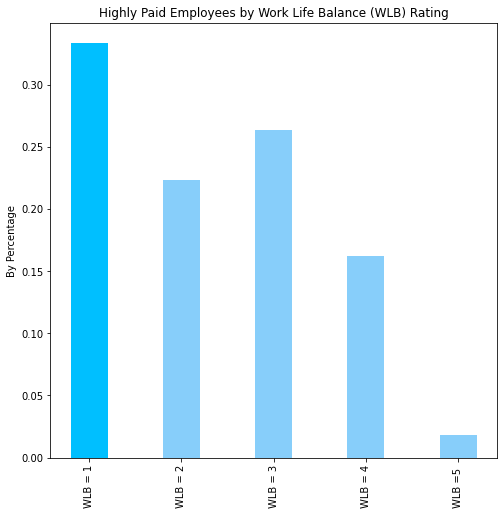

In [110]:
pct_high_paid_ees_by_wlb=[0.33306962025316456, 0.2231012658227848, 0.2634493670886076, 0.16218354430379747, 0.01819620253164557]
pos=[2,4,6,8,10]
bars=('WLB = 1', 'WLB = 2', 'WLB = 3', 'WLB = 4', 'WLB =5 ')

plt.clf()
fig= plt.figure(figsize=(8,8))
plt.bar(pos, pct_high_paid_ees_by_wlb, color=['deepskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue'])
plt.xticks(pos, bars, rotation=90, fontsize=10)
plt.ylabel("By Percentage")
plt.title("Highly Paid Employees by Work Life Balance (WLB) Rating")
plt.savefig("high_paid_by_wlb.jpg")
plt.show()

It may come as litte surprise that the highest percentage of highly paid employees rated their Work Life Balance as 1. However, all work and no play does not sum up all high earners at this company. Over 25% rated their Work Life balance as 3, higher than those with a rating of 2.

We can also use a pivot table to look at Highly Paid Employees by Work Life Balance Rating:

In [111]:
high_pay.pivot_table(index='Work_Life_balance', columns='Pay_Scale', aggfunc={'Pay_Scale':len}, fill_value=0)

Pay_Scale               
Pay_Scale              7.0  8.0  9.0  10.0
Work_Life_balance                         
1.0                     127  187   74   33
2.0                      66  147   42   27
3.0                      92  140   78   23
4.0                      60   87   38   20
5.0                       7   11    4    1

__________________

let's look at the realtionship between highly paid employees and higher education where we will view Education Levels of 3 or higher.

In [112]:
high_pay.to_csv('high_pay.csv')

In [113]:
high_pay_educated_3=high_pay[high_pay['Education_Level']==3]
# 504   

We can view this same data by age of employees.

In [114]:
data_3=high_pay_educated_3['Age']

In [115]:
data_3.describe()
# 479 employees are highly educated with education level of 3 and an average age of 40.56

count    479.00000
mean      40.56785
std       13.72439
min       19.00000
25%       28.00000
50%       40.00000
75%       54.00000
max       65.00000
Name: Age, dtype: float64

In [116]:
# I will now convert the data_3 object into a numpy array for further analysis
data_3_list=data_3.to_numpy()

In [117]:
# Let's remove the null values
data_3_list = data_3_list[~pd.isnull(data_3_list)]

In [118]:
# I will repeat the same steps for education levels 4 and 5 below:

In [119]:
high_pay_educated_4=high_pay[high_pay['Education_Level']==4]
# 412

In [120]:
data_4=high_pay_educated_4['Age']

In [121]:
data_4.describe()
# 387 employees are highly educated with education level of 4 and an average age of 39.33

count    387.000000
mean      39.335917
std       13.700756
min       19.000000
25%       27.000000
50%       37.000000
75%       52.000000
max       65.000000
Name: Age, dtype: float64

In [122]:
data_4_list=data_4.to_numpy()

In [123]:
# Remove null values
data_4_list = data_4_list[~pd.isnull(data_4_list)]

In [124]:
high_pay_educated_5=high_pay[high_pay['Education_Level']==5]
# 111

In [125]:
data_5=high_pay_educated_5['Age']

In [126]:
data_5.describe()
# 108 employees are highly educated with education level of 5 and an average age of 41.08

count    108.000000
mean      41.083333
std       13.461697
min       19.000000
25%       30.000000
50%       41.500000
75%       52.000000
max       65.000000
Name: Age, dtype: float64

In [127]:
data_5_list=data_5.to_numpy()

In [128]:
# Remove null values
data_5_list = data_5_list[~pd.isnull(data_5_list)]

---------------------------------------

A boxplot below will show highly paid employees and education levels 3-5 by age.

<Figure size 432x288 with 0 Axes>

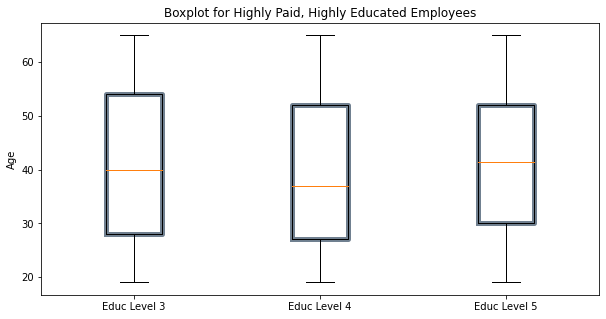

In [156]:
plt.clf()

data = [data_3_list, data_4_list, data_5_list]
  
fig = plt.figure(figsize =(10, 5))

ax = fig.add_subplot(111)

bp=ax.boxplot(data)
plt.boxplot(data)
plt.title("Boxplot for Highly Paid, Highly Educated Employees")
plt.ylabel("Age")
plt.xticks([1, 2, 3], ['Educ Level 3', 'Educ Level 4', 'Educ Level 5'])

for box in bp['boxes']:
    box.set(color='slategray', linewidth=5)
plt.savefig("summary_high_paid_high_ed.jpg")
plt.show()

Below are the 5 number summaries for each of the Education Levels 3, 4 and 5 in this boxplot.
The summaries show the following in the age category: minimum, maximum, median, first quartile, and third quartile. A vertical line goes through the box at the median.

Age of Highly Paid employees with Education Level 3:

In [130]:
data_min, data_max = data_3_list.min(), data_3_list.max()
quartiles = percentile(data_3_list, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 28.000
Median: 40
Q3: 54
Max: 65


-------------------------

Age of Highly Paid employees with Education Level 4:

In [131]:
data_min, data_max = data_4_list.min(), data_4_list.max()
quartiles = percentile(data_4_list, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 27.000
Median: 37
Q3: 52
Max: 65


------------------------------

Age of Highly Paid employees with Education Level 5:

In [132]:
data_min, data_max = data_5_list.min(), data_5_list.max()
quartiles = percentile(data_5_list, [25, 50, 75])
# print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 19
Q1: 30.000
Median: 42
Q3: 52
Max: 65


Interesting to know that highly paid employees with an Education Level of 4 have a median age of 5 years younger than Education Level 5 and three years younger than Education Level 3. 
It will be important to keep developing the careers and hold on to these highly education employees as they progress toward their professional goals. 

---------------------------------------------------------

Let's combine education levels 3-5 into one data set and take another look at the 5 number summary.

In [160]:
data_3_4_5=np.concatenate((data_3_list, data_4_list, data_5_list))

In [161]:
stats.describe(data_3_4_5)
# The average age of highly paid employees with education levels 3 or higher is 40.14

DescribeResult(nobs=974, minmax=(19.0, 65.0), mean=40.13552361396304, variance=187.37524242852712, skewness=0.15678013489932646, kurtosis=-1.2986668485275505)

In [162]:
quartiles = percentile(data_3_4_5, [25, 50, 75])

In [163]:
quartiles

array([28., 39., 52.])

In [139]:
# 5 number summary showing age of employees

data_min, data_max = data_3_4_5.min(), data_3_4_5.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 19.000
Q1: 28.000
Median: 39.000
Q3: 52.000
Max: 65.000


The median age for all highly paid, highly educated employees is 39, which falls in line with the median age of all company employees. This tells us that there is a good balance in the company. If the median for highly paid, highly educated employees was far above the median, this would tell us that the company has an aging work force in some critical company positions. Balance is important as you don't want to lose too many critical employees to retirement in a short time span without having replacements ready to move into these roles.

In [140]:
# Let's view high pay and education level in a pivot table
high_pay.pivot_table(index='Education_Level', columns='Pay_Scale', aggfunc={'Pay_Scale':len}, fill_value=0)

Pay_Scale               
Pay_Scale            7.0  8.0  9.0  10.0
Education_Level                         
1                      39   55   23    9
2                      33   52   23    7
3                     132  226   94   52
4                     115  192   77   28
5                      33   47   22    9

In [141]:
# high_pay.count() 
# =1268

We can also view the percentage of highly paid employees by education levels 3, 4 and 5

In [142]:
# pct_high_pay_ed_3=504/1268  
# = 0.39747634069400634

In [143]:
# pct_high_pay_ed_4= 412/1268   
# = 0.3249211356466877

In [144]:
# pct_high_pay_ed_5 = 111/1268  
# = 0.08753943217665615

Interesting to note that a much higher percentage of highly paid employees had an education level of 3 vs education level of 5

<Figure size 432x288 with 0 Axes>

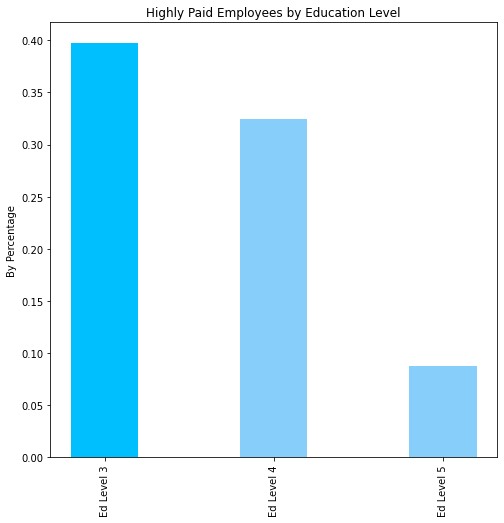

In [145]:
plt.clf()
pct_high_pay_high_ed=[0.39747634069400634,0.3249211356466877, 0.08753943217665615]
pos=[2,4,6]
bars=('Ed Level 3', 'Ed Level 4', 'Ed Level 5') 

fig= plt.figure(figsize=(8,8))
plt.bar(pos, pct_high_pay_high_ed, color=['deepskyblue', 'lightskyblue', 'lightskyblue'])
plt.xticks(pos, bars, rotation=90, fontsize=10)
plt.ylabel("By Percentage")
plt.title("Highly Paid Employees by Education Level")
plt.savefig("high_paid_by_Ed.jpg")
plt.show()

Below let's find the relationship between relationship status and work life balance

In [146]:
data_crosstab = pd.crosstab(df['Relationship_Status'],
                            df['Work_Life_balance'], 
                               margins = False)

In [147]:
data_crosstab
# Work Life Balalnce by Relationship Status (single=0, married=1)

Work_Life_balance,1.0,2.0,3.0,4.0,5.0
Relationship_Status,,,,,
0,332,226,294,183,24
1,577,446,541,339,33


In [148]:
#######Need to account for % of employees who are single vs married to accurately view relationship

In [149]:
data_crosstab = pd.crosstab([df.Relationship_Status, df.Work_Life_balance], 
                             df.Pay_Scale, margins = False)

In [150]:
data_crosstab
# Here we see the relationship of Pay Scale and relationship status by Work Life Balance; (single=0, married=1)

Pay_Scale                              1.0   2.0   3.0   4.0   5.0   6.0   \
Relationship_Status Work_Life_balance                                       
0                   1.0                   7    14    12    41    49    53   
                    2.0                   8     8     8    32    40    36   
                    3.0                   5    10     9    38    45    60   
                    4.0                   6     6     9    24    30    38   
                    5.0                   1     1     2     2     4     5   
1                   1.0                  13    17    20    78    87    96   
                    2.0                  10    12    11    63    76    85   
                    3.0                  17    18    24    90    82   103   
                    4.0                   7    19    16    50    58    54   
                    5.0                   0     1     0     4     8     6   

Pay_Scale                              7.0   8.0   9.0   10.0  
Relationship_Status Work_Life_balance                          
0                   1.0                  53    59    34     9  
                    2.0                  23    51    15     5  
                    3.0                  36    53    28    10  
                    4.0                  16    31    15     8  
                    5.0                   3     5     1     0  
1                   1.0                  74   128    40    24  
                    2.0                  43    96    27    22  
                    3.0                  56    87    50    13  
                    4.0                  44    56    23    12  
                    5.0                   4     6     3     1

In [151]:
data_crosstab = pd.crosstab([df.Relationship_Status, df.Pay_Scale], 
                             df.Work_Life_balance, margins = False)   

In [152]:
data_crosstab
# Another view of the data: Work Life balance and relationship status by Payscale; (single=0, married=1)

Work_Life_balance              1.0  2.0  3.0  4.0  5.0
Relationship_Status Pay_Scale                         
0                   1.0          7    8    5    6    1
                    2.0         14    8   10    6    1
                    3.0         12    8    9    9    2
                    4.0         41   32   38   24    2
                    5.0         49   40   45   30    4
                    6.0         53   36   60   38    5
                    7.0         53   23   36   16    3
                    8.0         59   51   53   31    5
                    9.0         34   15   28   15    1
                    10.0         9    5   10    8    0
1                   1.0         13   10   17    7    0
                    2.0         17   12   18   19    1
                    3.0         20   11   24   16    0
                    4.0         78   63   90   50    4
                    5.0         87   76   82   58    8
                    6.0         96   85  103   54    6
                    7.0         74   43   56   44    4
                    8.0        128   96   87   56    6
                    9.0         40   27   50   23    3
                    10.0        24   22   13   12    1

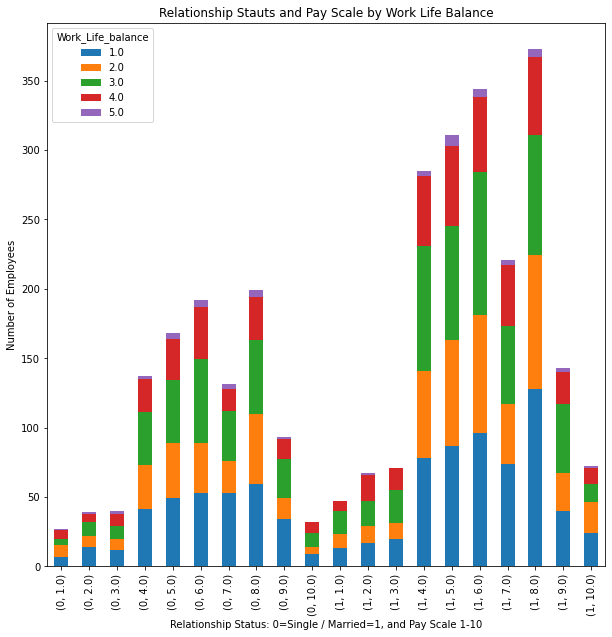

In [153]:
data_crosstab.plot.bar(figsize=(10,10),stacked=True)
plt.title("Relationship Stauts and Pay Scale by Work Life Balance")
plt.xlabel("Relationship Status: 0=Single / Married=1, and Pay Scale 1-10")
plt.ylabel("Number of Employees")
plt.savefig("relationship_status_&_payscale_by_wlb.jpg")
plt.show()

In [154]:
# The below histogram doesn't make much sense, work on this

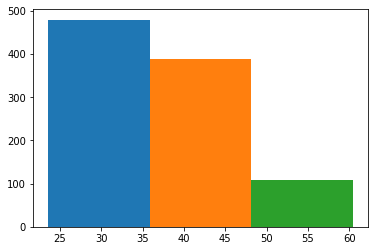

In [155]:
plt.clf()
x = [data_3_list, data_4_list, data_5_list]
plt.hist(x, bins = 1)
plt.show()